In [1]:
!pip install transformers torch


  Using cached filelock-3.20.0-py3-none-any.whl.metadata (2.1 kB)
  Using cached pyyaml-6.0.3-cp312-cp312-macosx_11_0_arm64.whl.metadata (2.4 kB)
  Using cached requests-2.32.5-py3-none-any.whl.metadata (4.9 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached typing_extensions-4.15.0-py3-none-any.whl.metadata (3.3 kB)
  Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.6 kB)
  Using cached sympy-1.14.0-py3-none-any.whl.metadata (12 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
  Using cached markupsafe-3.0.3-cp312-cp312-macosx_11_0_arm64.whl.metadata (2.7 kB)
  Using cached charset_normalizer-3.4.4-cp312-cp312-macosx_10_13_universal2.whl.metadata (37 kB)
  Using cached idna-3.11-py3-none-any.whl.metadata (8.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 69.0 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 566.1/566.1 kB 28.4 MB/s  0:00:00
 

In [3]:
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch
import torch.nn.functional as F

MODEL_NAME = "distilbert/distilgpt2"

tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
model = AutoModelForCausalLM.from_pretrained(MODEL_NAME)
model.eval()

def next_token_distribution(prompt: str, top_k: int = 10):
    inputs = tokenizer(prompt, return_tensors="pt")
    with torch.no_grad():
        outputs = model(**inputs)
        # logits shape: [batch, seq_len, vocab_size]
        logits = outputs.logits[:, -1, :]  # last position
        probs = F.softmax(logits, dim=-1).squeeze(0)  # [vocab_size]

    # Get top-k tokens
    topk_probs, topk_indices = torch.topk(probs, k=top_k)
    tokens = [tokenizer.decode([idx.item()]) for idx in topk_indices]
    return list(zip(tokens, topk_probs.tolist()))

prompt = "Machine learning is"
for tok, p in next_token_distribution(prompt, top_k=100):
    print(f"{repr(tok):>12}  {p:.4f}")


        ' a'  0.1674
      ' the'  0.0713
      ' not'  0.0525
       ' an'  0.0443
      ' one'  0.0256
     ' very'  0.0158
     ' also'  0.0126
     ' more'  0.0122
     ' just'  0.0113
     ' what'  0.0097
    ' about'  0.0095
      ' now'  0.0084
 ' becoming'  0.0083
' important'  0.0080
      ' all'  0.0071
    ' based'  0.0071
    ' still'  0.0070
     ' like'  0.0066
' something'  0.0066
       ' in'  0.0063
     ' part'  0.0062
   ' really'  0.0061
      ' how'  0.0058
     ' much'  0.0058
    ' going'  0.0056
    ' often'  0.0056
  ' another'  0.0056
' essential'  0.0054
      ' key'  0.0049
 ' critical'  0.0047
     ' hard'  0.0046
     ' done'  0.0044
' extremely'  0.0044
   ' simple'  0.0043
     ' easy'  0.0040
     ' only'  0.0038
       ' as'  0.0038
     ' that'  0.0037
       ' no'  0.0036
       ' at'  0.0036
      ' our'  0.0036
       ' so'  0.0034
       ' to'  0.0033
    ' great'  0.0033
  ' complex'  0.0032
    ' being'  0.0031
' difficult'  0.0031
     ' used' 

In [7]:
question = ["the", "life", "is"]

ans_so_far = ' '.join(question)
for i in range(50):
    nextword, p = next_token_distribution(ans_so_far, top_k=1)[0]
    ans_so_far = ans_so_far + ' ' + nextword

print(ans_so_far)

the life is  a  thing ,  and                                                                                            


## Implement Beam search
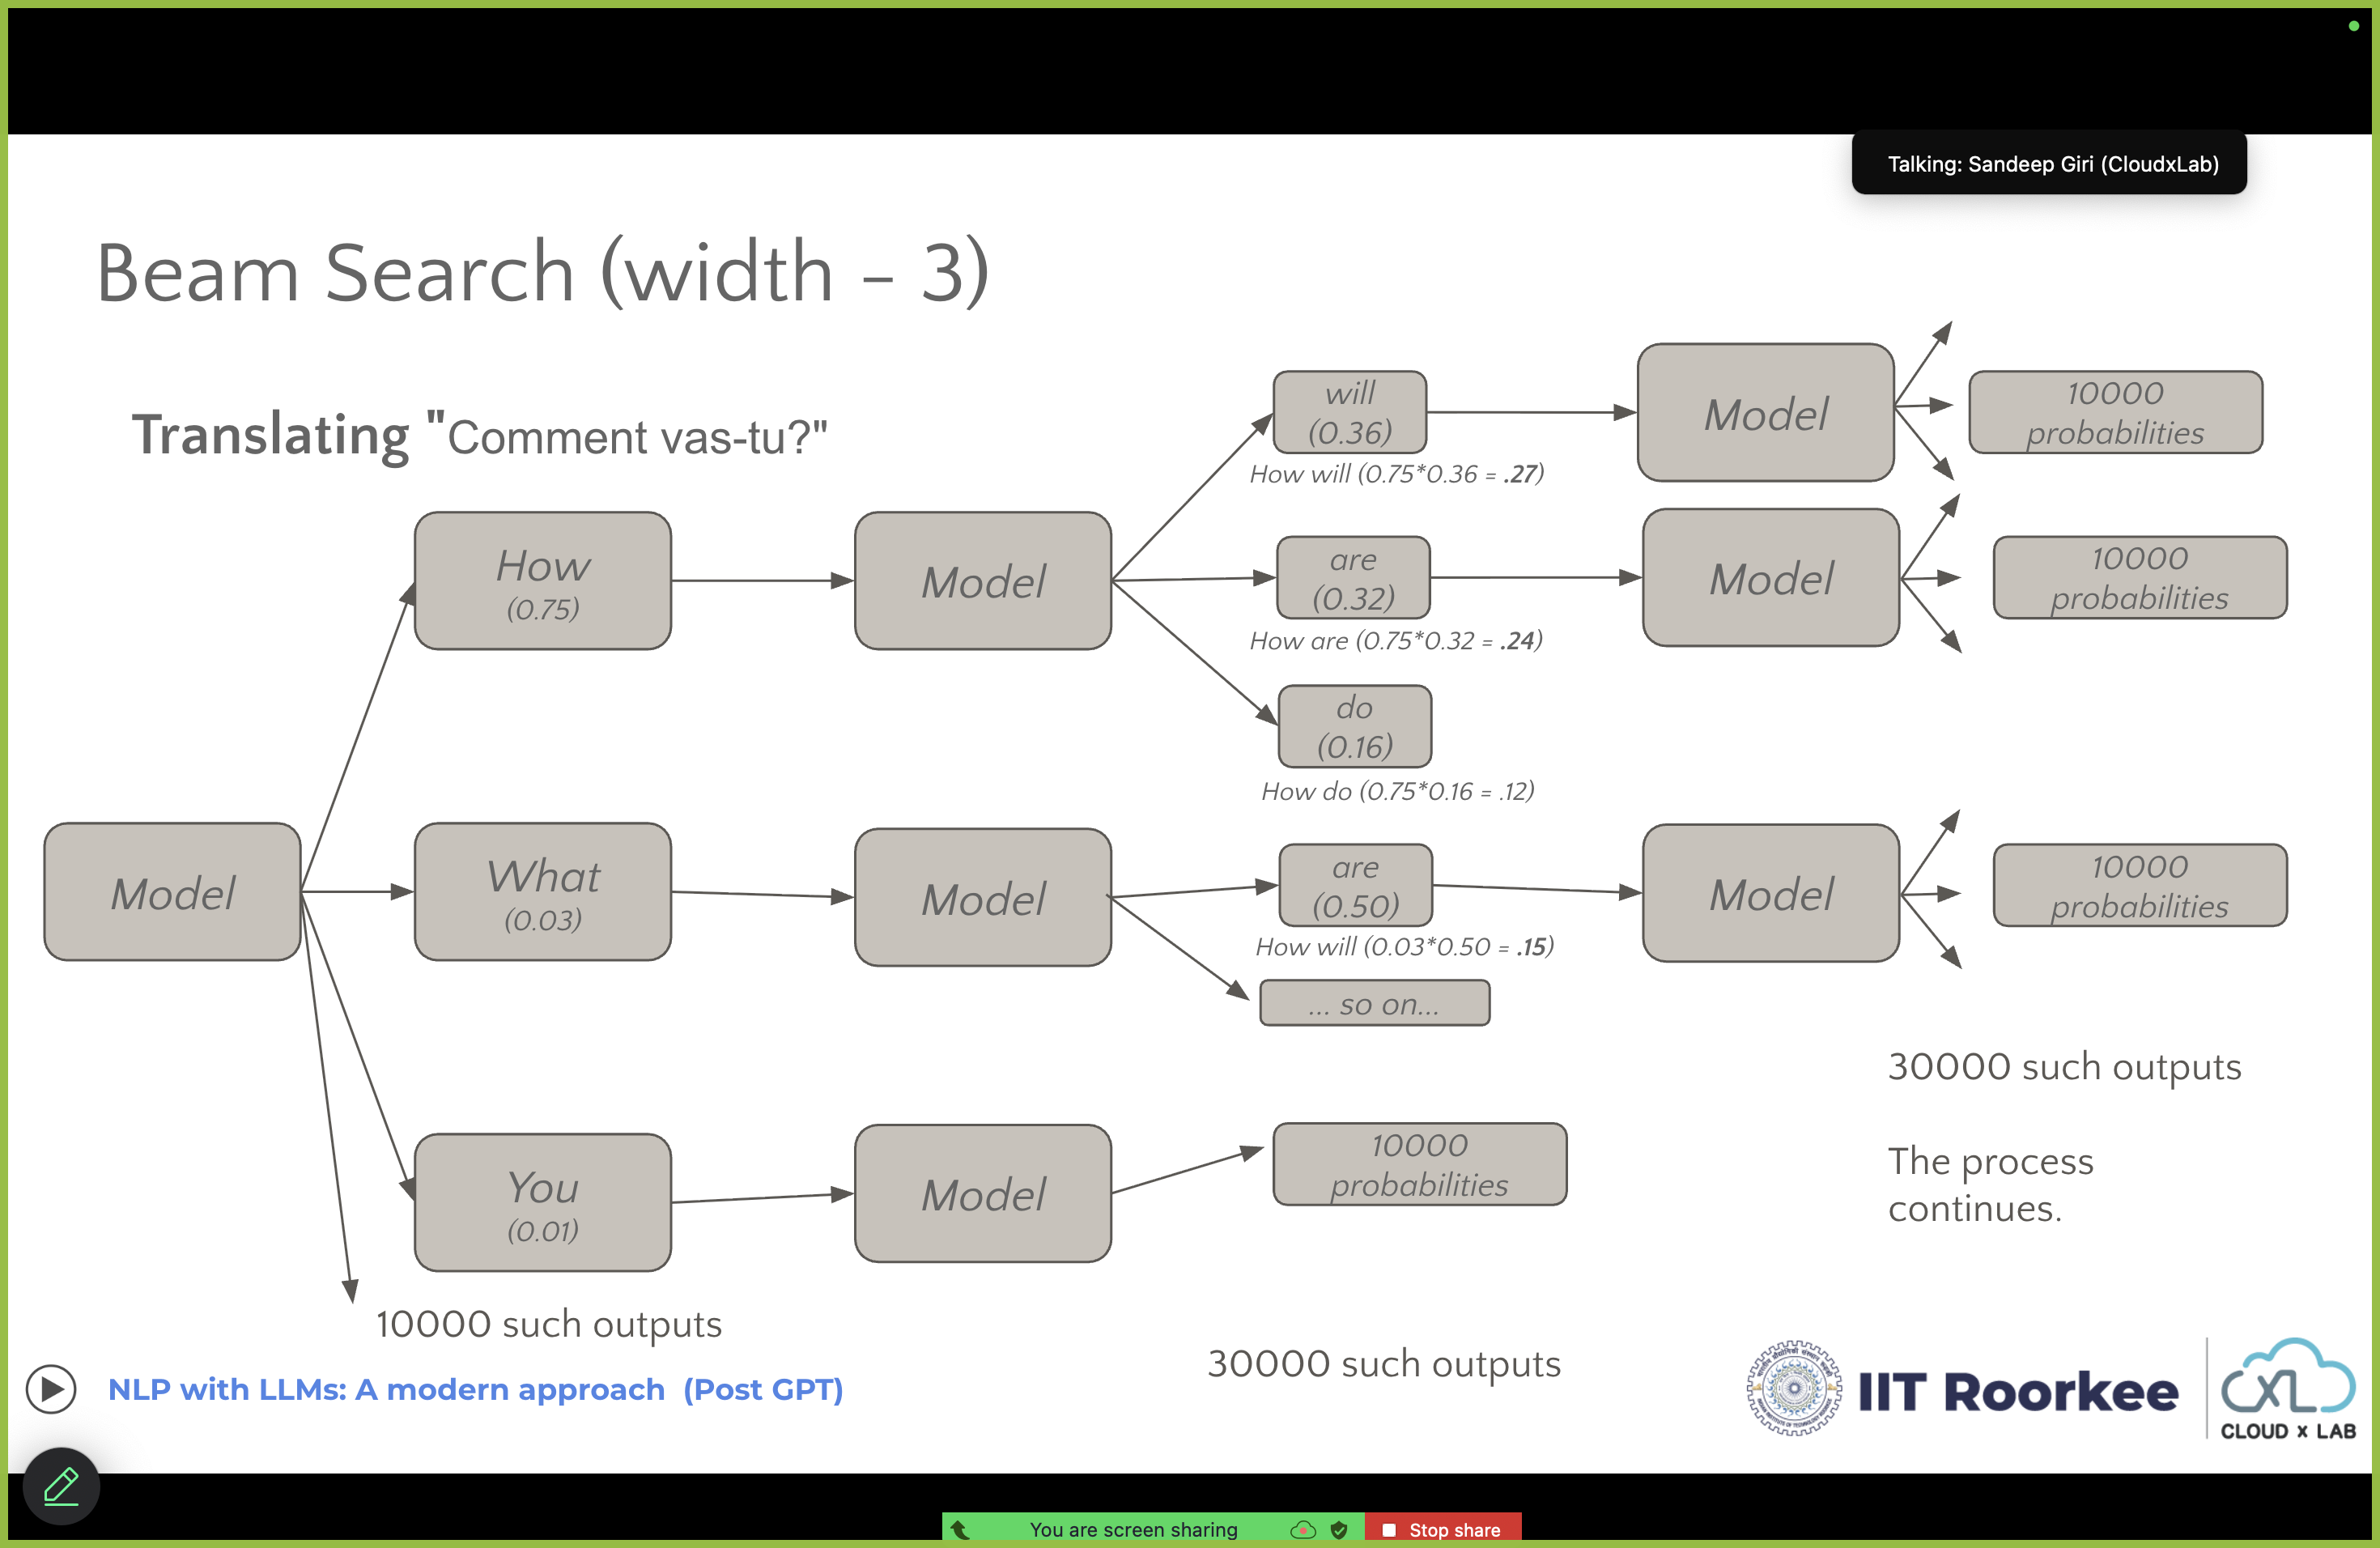
